# ML Assignment
C21383126 - Jennifer Kearns

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv', encoding='latin-1')
df.head()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

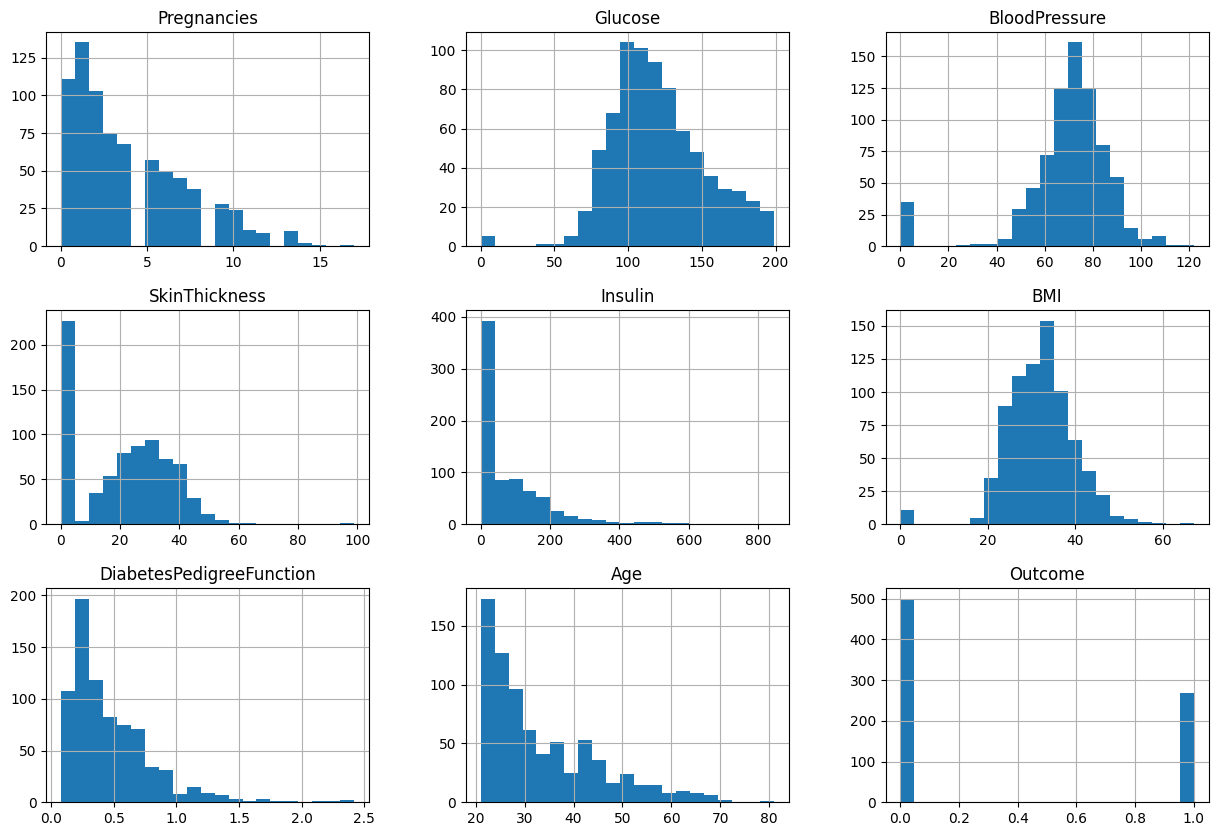

In [2]:
import matplotlib.pyplot as plt
df.hist(bins=21, figsize=(15, 10))
plt.show

In [3]:
print(f"{(df['Insulin']==0).sum()} out of {df['Insulin'].count()}")

374 out of 768


In [4]:
# replace null values (0s) with median values for Glucose, BloodPressure, and BMI columns

columns_to_replace = ['Glucose', 'BloodPressure', 'BMI']

for column in columns_to_replace:
    median_value = df[column].replace(0, pd.NA).median() # calculates median ignoring 0s
    df[column] = df[column].replace(0, median_value) # replace 0s with median value

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


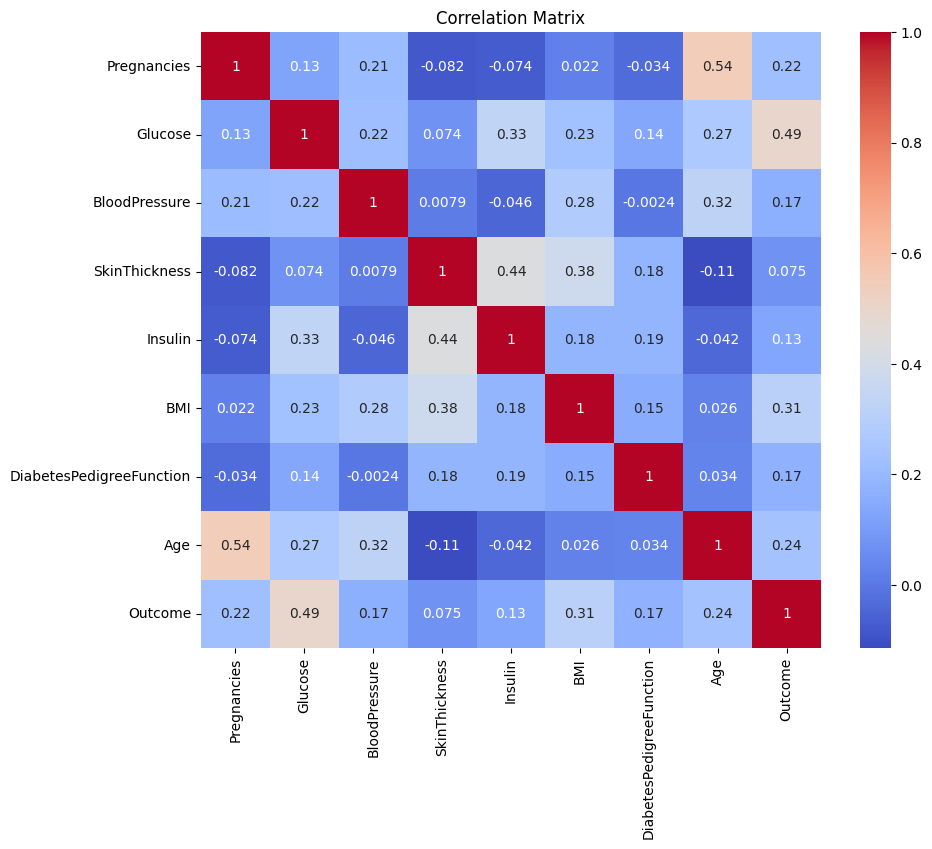

In [5]:
import seaborn as sns

# correlation matrix - correlation of Insulin and SkinThickness with other features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Insulin & Glucose, SkinThickness & BMI have high correlation
import numpy as np

# esitmate the coefficients of the linear regression line using the least squares method
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculate regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)
    

In [7]:
# plot the regression line and the data points
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
        marker = "o", s = 30)
    
    # predicted response vector
    y_pred = b[0] + b[1]*x
    
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

C:\Users\jenni\AppData\Local\Temp\ipykernel_14224\196175405.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[212.45966465  71.29290179 290.88564402 140.75591209 138.51516982
 160.92259249 127.31145848 257.27451    192.29298424 104.9040358
 120.58923168 102.66329354 320.0152935  147.47813889 210.21892238
 142.99665435 125.07071621  86.97809766 154.20036569 190.05224197
 109.38552034  82.49661313 178.84853064 118.34848941 237.10782959
 284.16341721 207.97818011  39.92251004 111.62626261 116.10774714
  44.40399458 207.97818011  69.05215952 178.84853064  14.
 136.27442755 102.66329354 125.07071621 125.07071621 163.16333476
  57.84844818 142.99665435  19.75582963  93.70032447 174.3670461
 131.79294302 134.03368528  46.64473685 107.14477807 187.81149971
 118.34848941 120.58923168  60.08919045 181.0892729   86.97809766
 246.07079866 219.18189145 160.92259249  71.29290179  95.94106673
  51.12622138 207.97818011 158.68

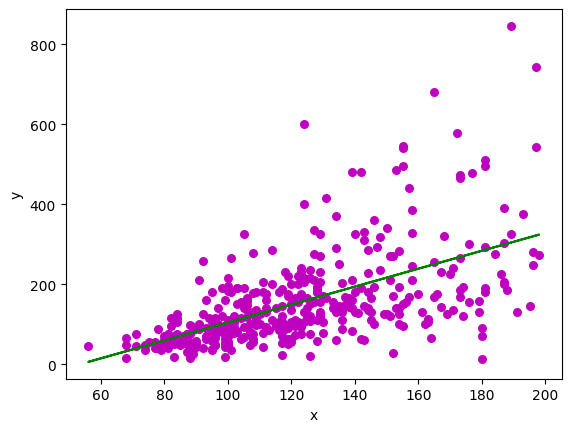

In [8]:
# fill missing Insulin values using Glucose
insulin_no_zeros = df[df['Insulin'] != 0]
insulin_with_zeros = df[df['Insulin'] == 0]
# calculate regression coefficients
b_insulin = estimate_coef(insulin_no_zeros['Glucose'], insulin_no_zeros['Insulin'])

# plot regression line
plot_regression_line(insulin_no_zeros['Glucose'], insulin_no_zeros['Insulin'], b_insulin)

# predict and fill missing values
predicted_insulin = b_insulin[0] + b_insulin[1] * insulin_with_zeros['Glucose']
predicted_insulin = np.maximum(predicted_insulin, insulin_no_zeros['Insulin'].min()) # ensure predictions are positive
df.loc[df['Insulin'] == 0, 'Insulin'] = predicted_insulin

C:\Users\jenni\AppData\Local\Temp\ipykernel_14224\2746856675.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[19.65828906 21.93469817 31.53520616 28.56597688 33.81161526 34.2075125
 23.41931281 26.28956777 25.89367054 31.63418046 35.98905006 35.59315283
 30.34751445 16.29316255 29.45674566 36.3849473  23.71623574 25.99264485
 28.56597688 36.68187023 28.56597688 29.15982274 21.34085232 29.06084843
 38.85930503 39.55212519 28.86289981 39.35417657 28.56597688 44.89673788
 15.50136808 20.15316061 35.19725559 22.42956972 18.86649459 35.79110145
 18.76752028 30.24854014 27.47725948 30.24854014 29.95161721 23.12238988
 29.55571997 24.21110728 29.55571997 27.47725948 17.48085426 28.66495119
 29.95161721 18.27264874 44.0059691  27.87315672 25.89367054 28.17007965
 27.08136225 27.47725948 41.13571414 35.2962299  19.55931475 23.12238988
 23.91418435 18.9654689  26.68546501 48.3608387  20.64803215 36.28597299
 33.91058957

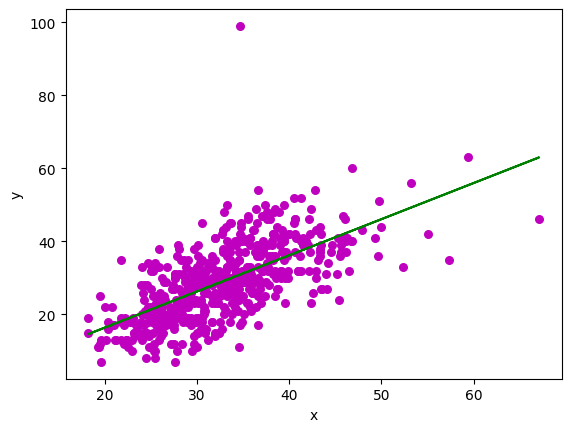

In [9]:
# fill missing SkinThickness values using BMI
skin_no_zeros = df[df['SkinThickness'] != 0]
skin_with_zeros = df[df['SkinThickness'] == 0]

# calculate regression coefficients
b_skin = estimate_coef(skin_no_zeros['BMI'], skin_no_zeros['SkinThickness'])

# plot regression line
plot_regression_line(skin_no_zeros['BMI'], skin_no_zeros['SkinThickness'], b_skin)

# predict and fill missing values
predicted_skin = b_skin[0] + b_skin[1] * skin_with_zeros['BMI']
predicted_skin = np.maximum(predicted_skin, skin_no_zeros['SkinThickness'].min()) # ensure predictions are positive
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = predicted_skin

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,28.719593,153.489321,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.546506,97.078377,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,90.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.417515,133.016843,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.013060,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

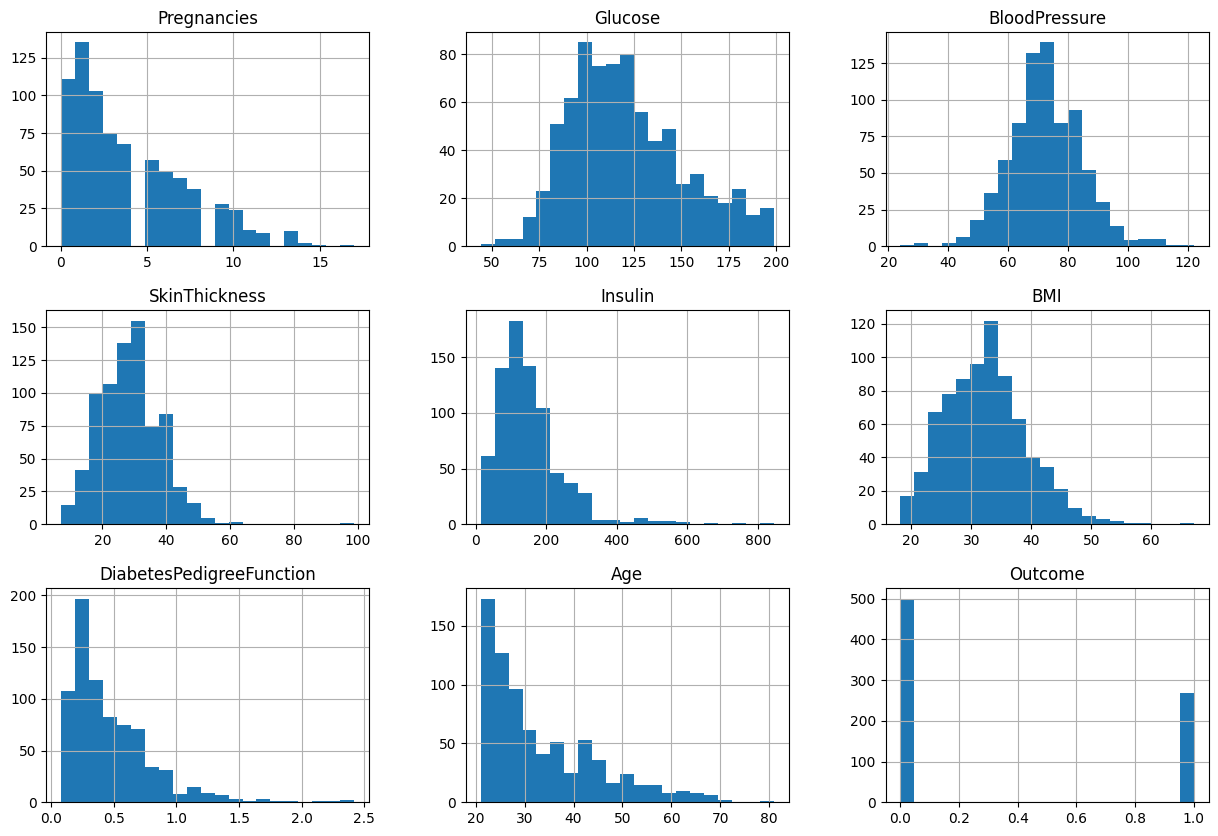

In [11]:
df.hist(bins=21, figsize=(15, 10))
plt.show

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


# KNN Classifier
Linear Regression to handle null values in Insulin and SkinThickness columns

In [13]:
# scale the features - for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# train KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [15]:
knn.score(X_test_scaled, y_test)

0.7662337662337663

In [16]:
from sklearn import metrics
y_pred = knn.predict(X_test_scaled)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
knn_precision = metrics.precision_score(y_test, y_pred)
knn_recall = metrics.recall_score(y_test, y_pred)
knn_f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1:", knn_f1)

Accuracy: 0.7662337662337663
Precision: 0.6901408450704225
Recall: 0.6049382716049383
F1: 0.6447368421052632


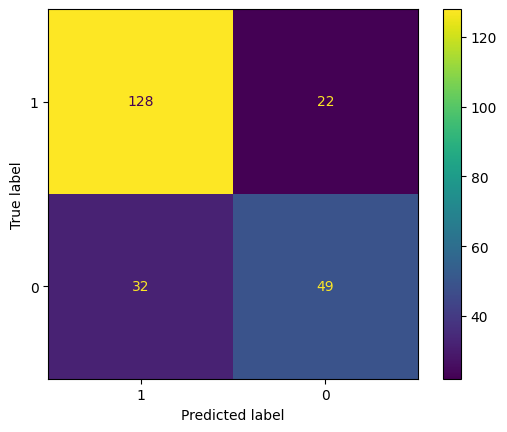

In [17]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= y.unique())
cm_display.plot()
plt.grid(False)
plt.show()

# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
db_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
db_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
from sklearn.tree import export_text
feature_names = X.columns
tree_rules = export_text(db_clf, feature_names = list(feature_names))
print(tree_rules)

|--- Glucose <= 132.50
|   |--- Age <= 29.50
|   |   |--- BMI <= 45.40
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  45.40
|   |   |   |--- SkinThickness <= 35.50
|   |   |   |   |--- class: 0
|   |   |   |--- SkinThickness >  35.50
|   |   |   |   |--- class: 1
|   |--- Age >  29.50
|   |   |--- BMI <= 26.90
|   |   |   |--- class: 0
|   |   |--- BMI >  26.90
|   |   |   |--- Insulin <= 106.07
|   |   |   |   |--- class: 0
|   |   |   |--- Insulin >  106.07
|   |   |   |   |--- class: 1
|--- Glucose >  132.50
|   |--- BMI <= 29.95
|   |   |--- Glucose <= 151.50
|   |   |   |--- Age <= 50.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  50.50
|   |   |   |   |--- class: 0
|   |   |--- Glucose >  151.50
|   |   |   |--- Age <= 61.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  61.00
|   |   |   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 155.50

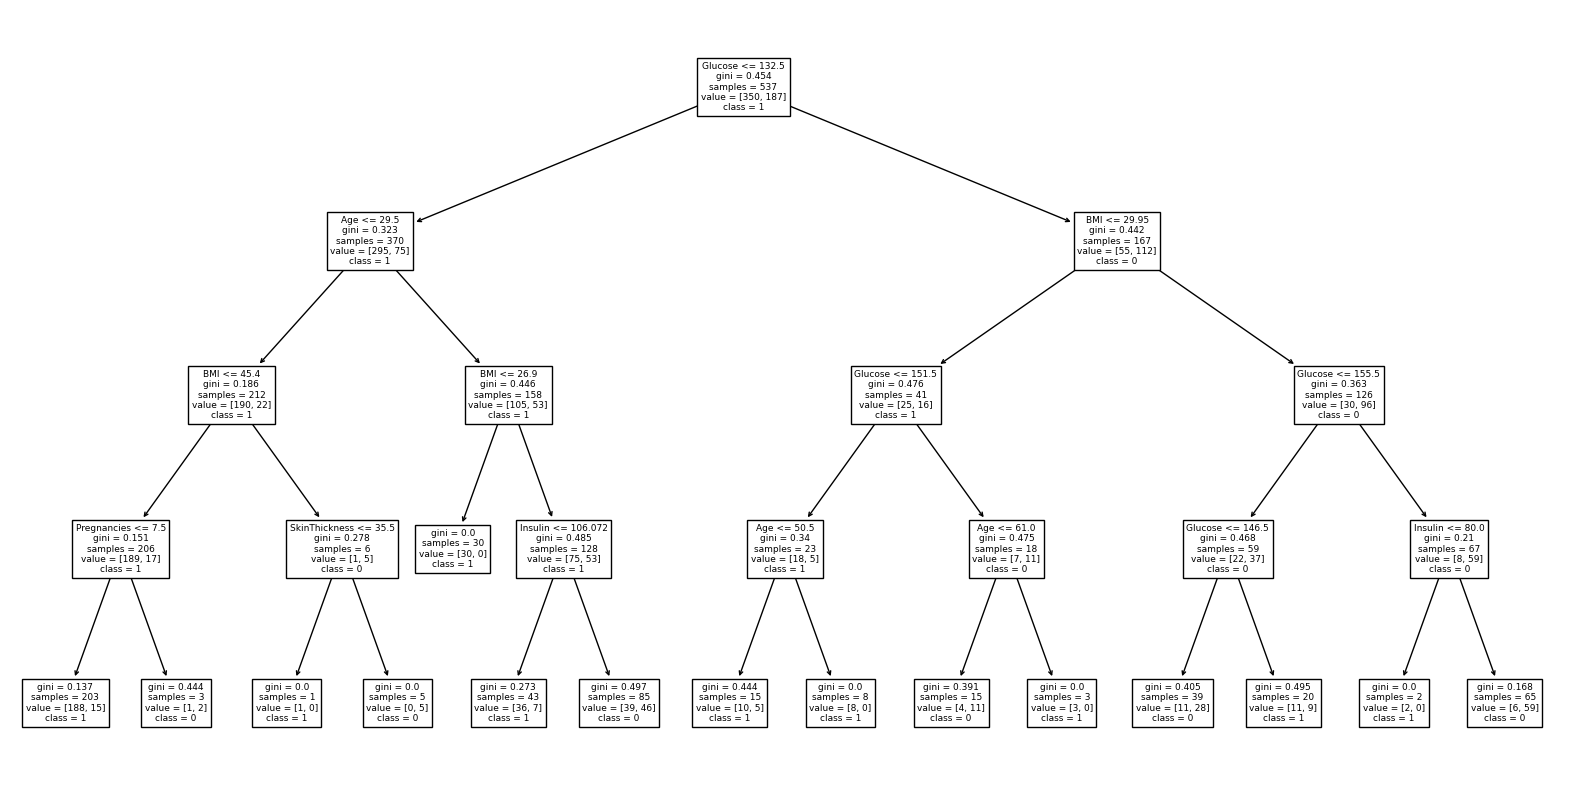

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
a = tree.plot_tree(db_clf, feature_names = feature_names, class_names = [str(cls) for cls in y.unique()])
plt.show()

In [21]:
y_pred = db_clf.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
dt_precision = metrics.precision_score(y_test, y_pred)
dt_recall = metrics.recall_score(y_test, y_pred)
dt_f1 = metrics.f1_score(y_test, y_pred)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1:", dt_f1)

Accuracy: 0.7619047619047619
Precision: 0.6585365853658537
Recall: 0.6666666666666666
F1: 0.6625766871165645


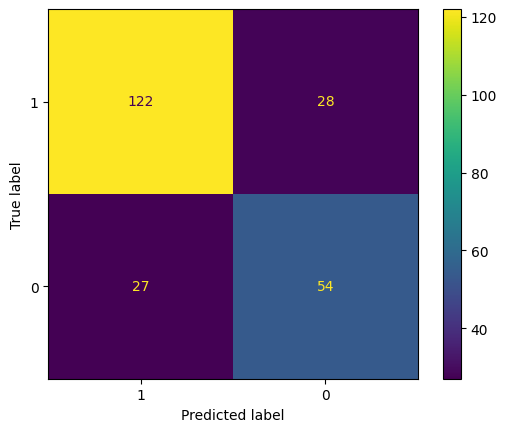

In [22]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels= y.unique())
cm_display.plot()
plt.grid(False)
plt.show()

# K-Fold Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = knn

# define k-fold cross-validation
# stratified ensures equal class representation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and get scores
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# Results
print("Accuracy for each fold: ", scores)
print(f"Mean Accuracy: {scores.mean():.2f}")

Accuracy for each fold:  [0.74025974 0.73376623 0.76623377 0.76470588 0.69281046]
Mean Accuracy: 0.74


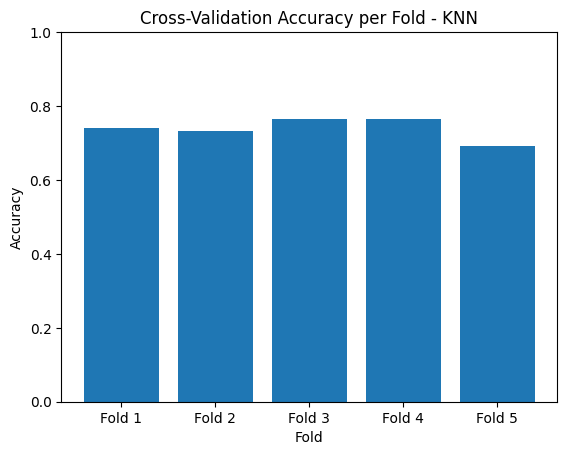

In [24]:
# Plot the scores for each fold
plt.bar(range(1, len(scores) + 1), scores, tick_label=[f"Fold {i}" for i in
range(1,len(scores) + 1)])
plt.title("Cross-Validation Accuracy per Fold - KNN")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0) # Set y-axis limits for better visibility
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = db_clf

# define k-fold cross-validation
# stratified ensures equal class representation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and get scores
scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
# Results
print("Accuracy for each fold: ", scores)
print(f"Mean Accuracy: {scores.mean():.2f}")

Accuracy for each fold:  [0.70779221 0.72727273 0.76623377 0.77777778 0.69934641]
Mean Accuracy: 0.74


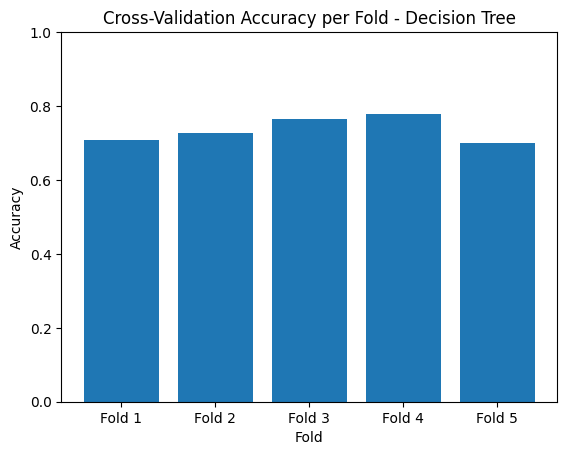

In [26]:
# Plot the scores for each fold
plt.bar(range(1, len(scores) + 1), scores, tick_label=[f"Fold {i}" for i in
range(1,
len(scores) + 1)])
plt.title("Cross-Validation Accuracy per Fold - Decision Tree")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0) # Set y-axis limits for better visibility
plt.show()

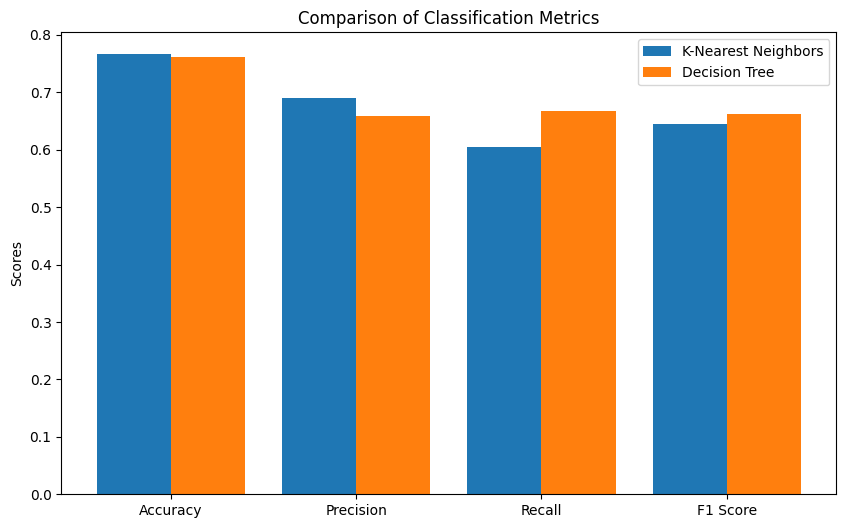

In [27]:
# compare metrics
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, knn_metrics, width=0.4, label='K-Nearest Neighbors')
plt.bar(x + 0.2, dt_metrics, width=0.4, label='Decision Tree')

# add labels and title
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics')
plt.legend()

plt.show()